### 1. 載入套件

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# 以下用來消除程式在運行中出現不必要的警告
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### 2.載入資料與分析資料

In [50]:
data = pd.read_csv(r'E:\DataLearn\1-DataVisionandPrediction\1-Keras Regression Code Along Project\kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [51]:
# 檢查資料變數空值
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

資料沒有任何空值，因此直接進入頗析

In [52]:
# describe() 將資料轉換成描述性統計
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Axes: xlabel='price', ylabel='Count'>

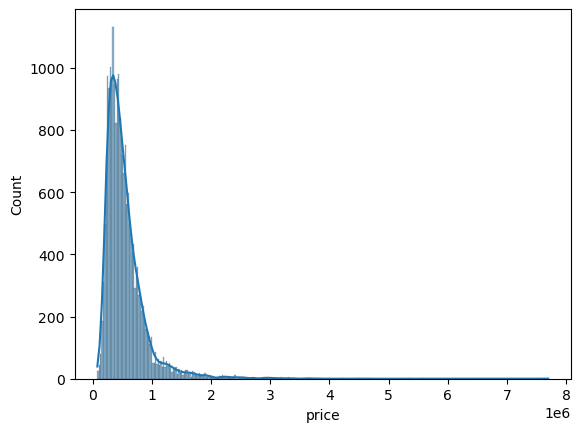

In [53]:
# 筆記這邊繪製圖片，distplot會被報告錯誤之後要移除，所以改histplot
# seaborn 在 v0.14.0 移除了 distplot，改用 histplot 
plt.figure()
sns.histplot(data['price'], kde=True)

<Figure size 2000x1000 with 0 Axes>

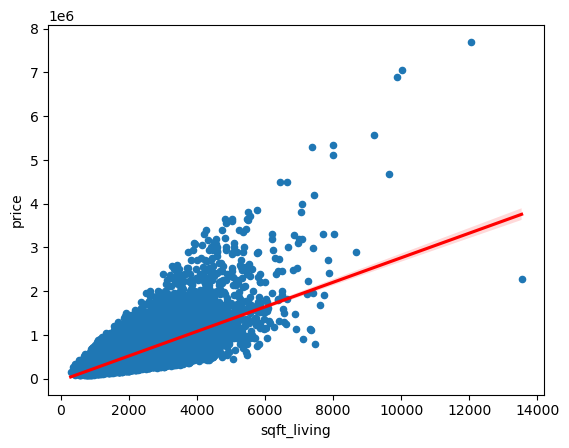

In [54]:
# 觀察 price 與 sqft_living(內部生活面積) 的關係
plt.figure(figsize=(20,10))
data.plot.scatter(x='sqft_living', y ='price')
sns.regplot(x='sqft_living', y ='price', data=data,scatter=False, color='r')
plt.show()

從以上分析的圖表來說，當房屋生活的面積越大，價格就會越高

<Axes: xlabel='bedrooms', ylabel='count'>

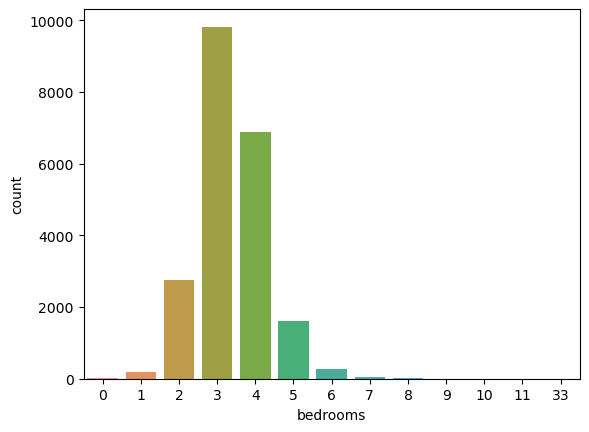

In [55]:
# 修正源資料程式 (x=data['bedrooms']) 要指定 X 軸資料
sns.countplot(x=data['bedrooms'])

<Axes: xlabel='bedrooms', ylabel='price'>

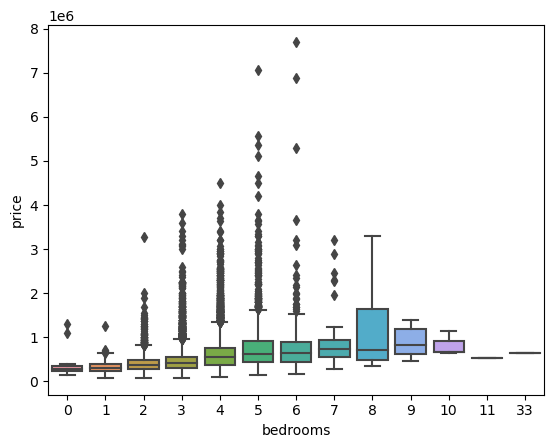

In [56]:
sns.boxplot(x='bedrooms', y='price', data=data)

* 1.從以上臥室量與房屋價格來比，離群值似乎蠻多的，日後可能需要回過頭來處理
* 2.圖片中確實臥室數量越多房屋價格就會越高，但是後面 臥室數量為 11跟33 樣本數似乎特別少

#### 觀察地理位置與房屋價個的關係

先來觀察 long(經度) 與價格之間的關係

<Axes: xlabel='price', ylabel='long'>

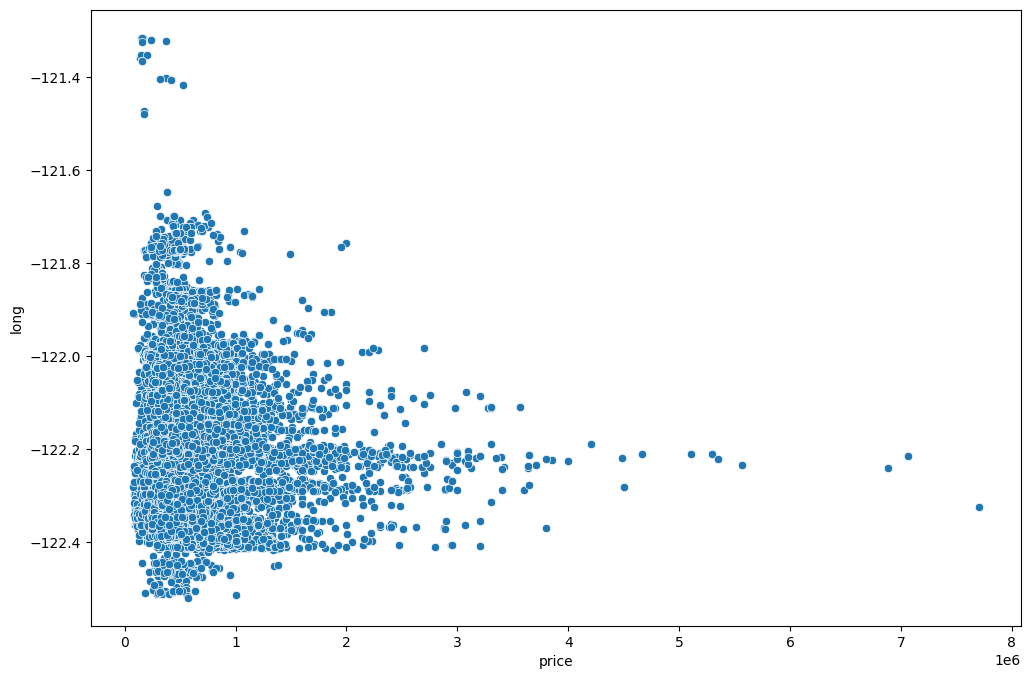

In [57]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=data)

* 1.從以上圖表來看 經度處在 122.2-122.4 擁有比較高的物件價格
* 2.再來我們分析 lat(緯度) 與價格之間的關係

<Axes: xlabel='price', ylabel='lat'>

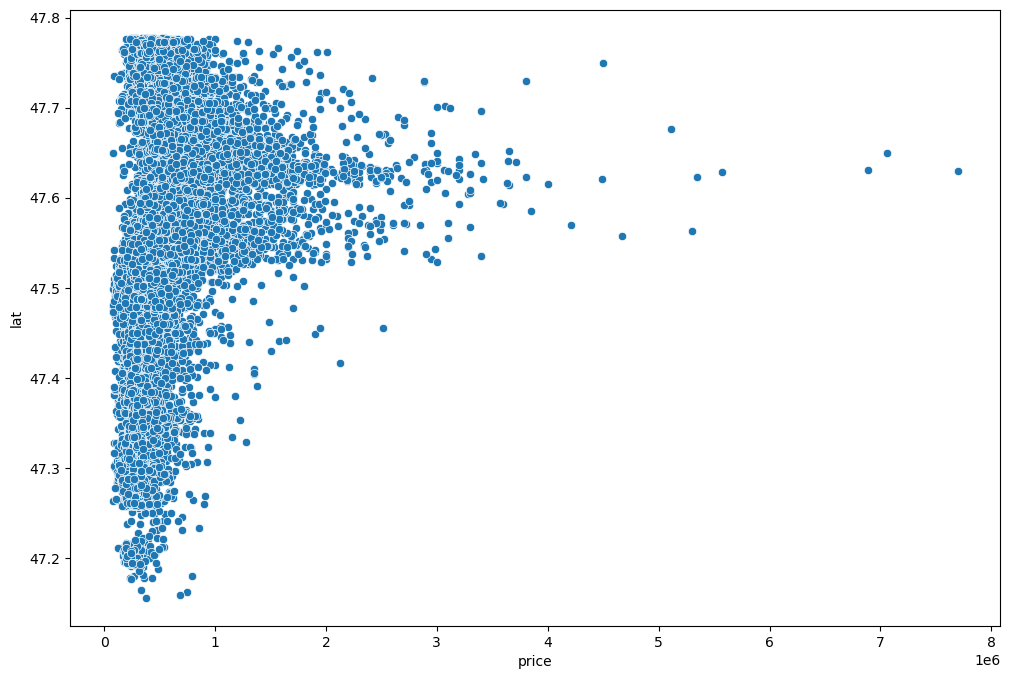

In [58]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='lat', data=data)

* 1.從以上圖表來看，緯度在 47.5- 47.7這區域擁有高的價格物件
* 2.再來做一個 綜合的物件經緯度與售價的分布

<Axes: xlabel='long', ylabel='lat'>

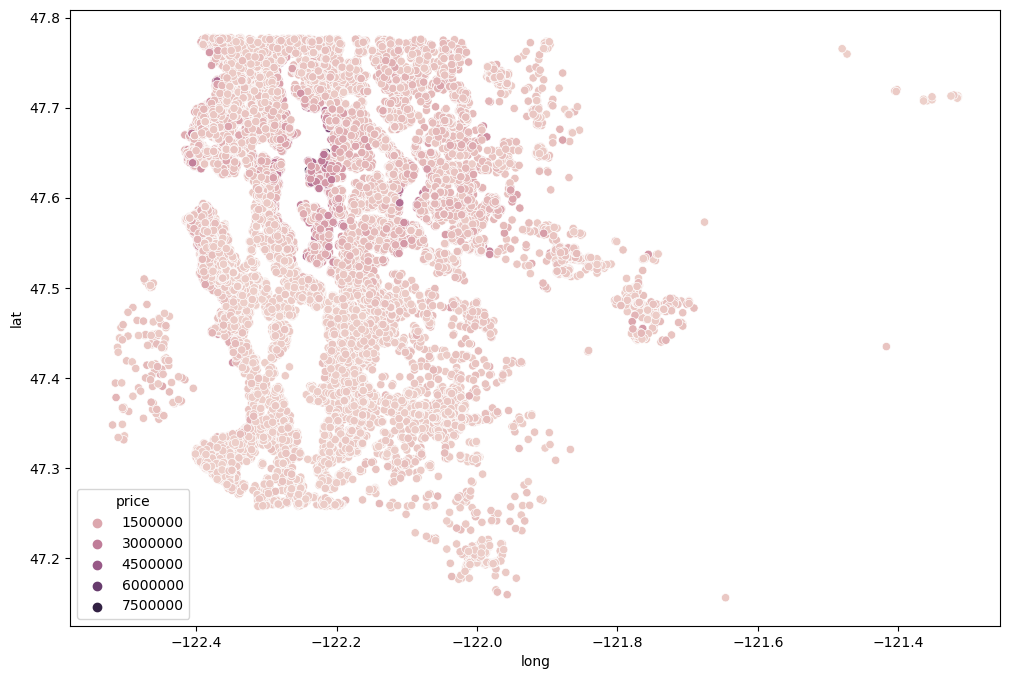

In [59]:
plt.figure(figsize=(12, 8))
# hue='price' 把經緯度的點散分布圖，顏色以 price 下去做分析
sns.scatterplot(x='long', y='lat', data=data, hue='price')

In [60]:
# 觀察數據售價最高的觀察值
data.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [61]:
# 計算出資料前百分之一的資料有那些
len(data)*(0.01)

216.13

In [62]:
# 挑選出售價 前面百分之一的觀察值
top_1_per_data = data.sort_values('price', ascending=False).iloc[216:]
top_1_per_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3281,8964800025,20150226T000000,1965000.0,5,3.75,3940,13738,1.5,0,3,...,9,3940,0,1951,0,98004,47.6203,-122.212,2370,13320
12577,2806300065,20150422T000000,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
12283,1923000260,20141015T000000,1959000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
1152,4055701200,20150421T000000,1955000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
9175,3124059023,20150213T000000,1955000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387


<Axes: xlabel='long', ylabel='lat'>

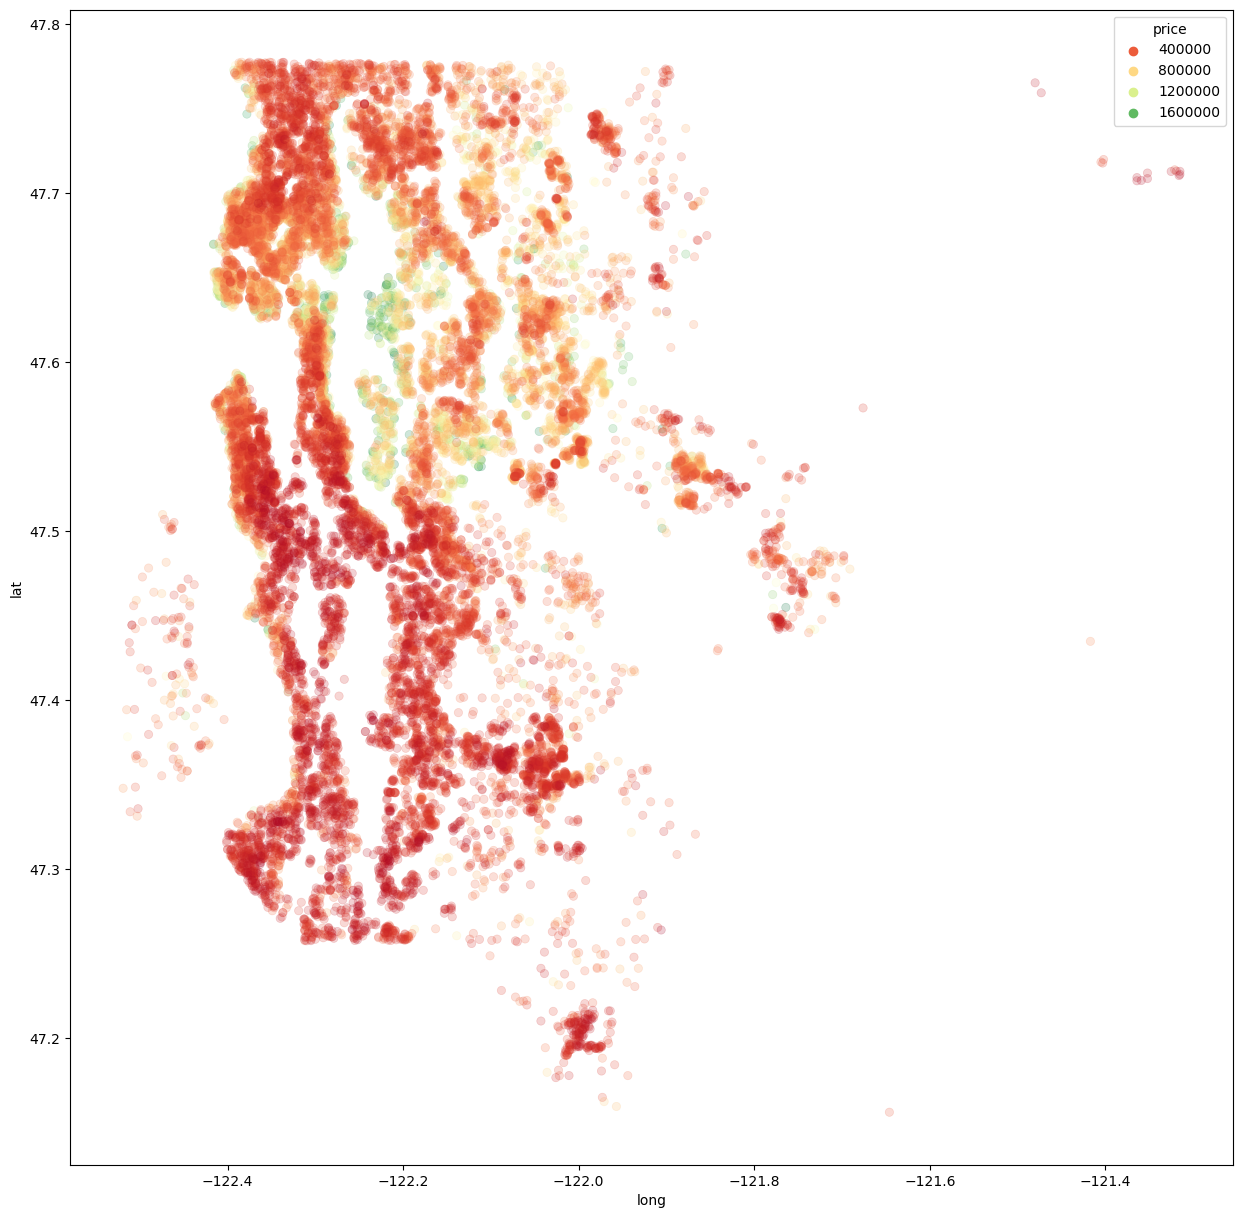

In [63]:
# 繪製前百分之一的 價格觀察值 與 經緯度關係
plt.figure(figsize=(15, 15))
sns.scatterplot(x='long',
                y='lat',
                data=top_1_per_data,
                hue='price',
                palette='RdYlGn',  # 圖片調色板，顏色由 紅到綠   
                edgecolor=None,    # 點散之間沒有邊界顏色
                alpha=0.2)         # 透明度

來看看其他的特徵

<Axes: xlabel='waterfront', ylabel='price'>

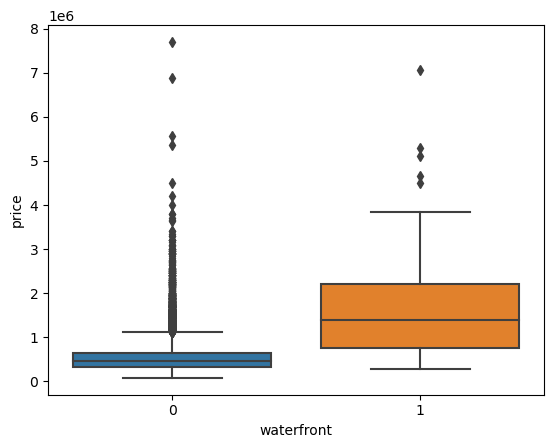

In [64]:
# waterfront 俯瞰水域
sns.boxplot(x='waterfront', y='price', data=data)

### 3.處理資料

In [65]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [67]:
# 刪除 id 欄位
data = data.drop('id', axis=1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


從日期進行特徵分析

In [68]:
# 先將 date 欄位資料轉乘時間
data['date'] = pd.to_datetime(data['date'])

In [69]:
# 抽取出月份資料，並建立一個月份欄位
data['month'] = data['date'].apply(lambda date: date.month)
# 抽取出年份資料，並建立一個年份欄位
data['year'] = data['date'].apply(lambda date: date.year)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


* 從以上欄位可以看到date欄位已經變成 year-month-date，另外最後兩欄位有 year 與 month
* 來觀察資料中有那些年分，與他的售價分布

<Axes: xlabel='year', ylabel='price'>

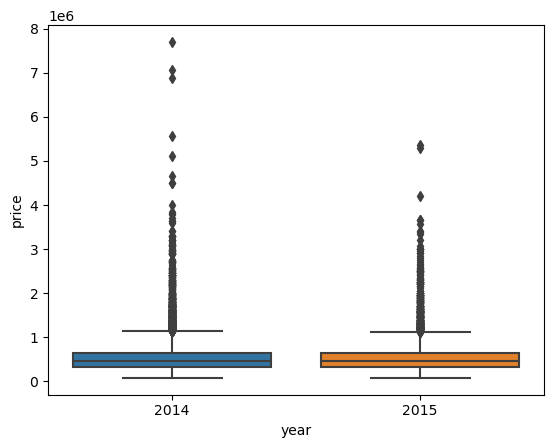

In [70]:
sns.boxplot(x='year', y='price', data=data)

在來觀察分布在不同月份與售價的盒狀圖

<Axes: xlabel='month', ylabel='price'>

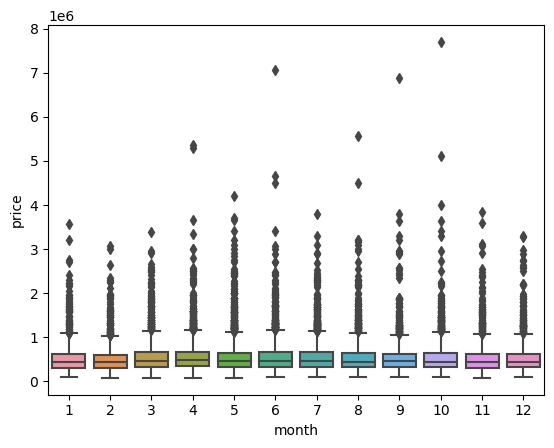

In [71]:
sns.boxplot(x='month', y='price', data=data)

<Axes: xlabel='month'>

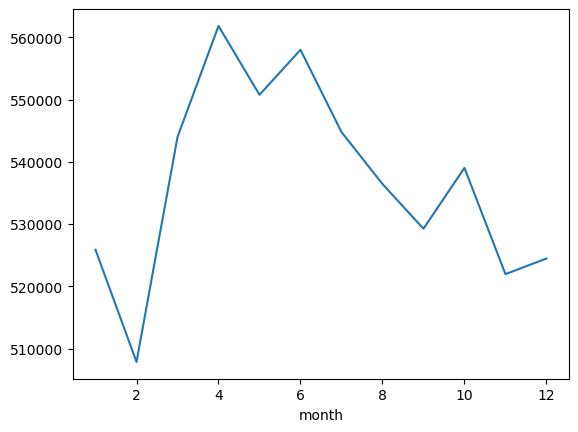

In [72]:
# 計算每個月份的平均價格
data.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

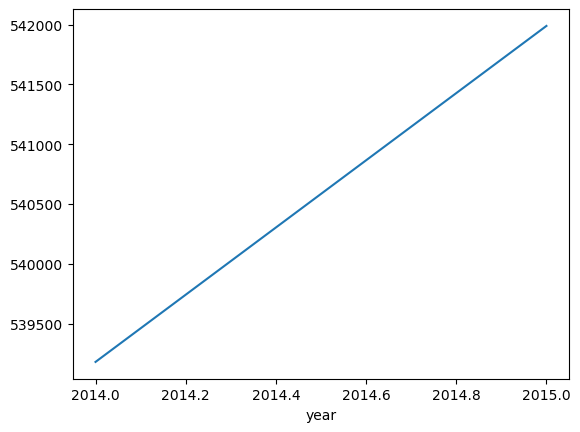

In [73]:
data.groupby('year').mean()['price'].plot()

In [74]:
# 將 date 欄位刪除
data = data.drop('date', axis=1)
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

接下來查看郵政編碼

In [75]:
data['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [76]:
# 郵政編碼這個變數對於未來的建立模型可能沒有幫助，因此刪除
data = data.drop('zipcode', axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


### 4.Scaling(特徵轉換)與Train-Test-Split(訓練與測試資料分割)

In [77]:
# x 用來訓練的資料，去除目標變數 price。 這個資料全部都是特徵
X = data.drop('price', axis=1)
# y 目標預測變數
y = data['price']

In [78]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [79]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

### 5.切割與處理數據

In [80]:
# 導入 train_test_split 來切割資料
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=101)

* 將特徵 (X) 與 目標 (Y) 數據分割成訓練 和 測試集
* **test_size** (通常都 0.2或0.3)，如果資料較小可能需要更多 **test_size**
* **random_state** 參數用於設置數據分割的隨機性，如果不設置就是隨機種子
* **random_state** 可以透過多次調整選擇最好的數值

**Scaling** 進行特徵縮放

In [82]:
from sklearn.preprocessing import MinMaxScaler

* 使用 MinMaxScaler() 來歸一化模型
* fit_transform 方法首先對 X_train 中的特徵計算最小值和最大值
* 然後使用 MinMaxScaler 的公式將特徵值轉換為[0, 1]範圍內的值。

In [83]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* 1.**fit_transform** 用於訓練（fit）並同時進行特徵縮放的轉換。
    * 會用在訓練數據上
* 2.**transform** 用於對數據進行特徵縮放的轉換，但不進行訓練。
    * 會用在測試數據上

In [84]:
X_train.shape

(15129, 19)

In [85]:
X_test.shape

(6484, 19)

### 6. 創建模型

套件說明筆記
* 1.Sequential 是用於建立序列型深度學習模型的容器。
   這種模型由一系列層**（layers）**按照順序堆疊而成，每一層都可以包含多個神經元或節點。
* 2.Dense 類別用於定義全連接**（fully connected）**的神經網絡層
* 3.**Activation** 類別用於指定層的激活函數。
* 4.**Adam**是一種優化算法，通常用於訓練神經網絡。
   它是一種自適應學習率優化算法，可以幫助模型更快地收斂到最小值。

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

下面程式說明筆記
* 1.創建一個 **model. Sequential** 是一個容器，用於堆疊神經網絡
* 2.這裡堆疊 6 個 **(Denes Layer)**全連接層
    * 每一層都有 19 個神經元，並使用 **ReLU（修正的線性單元）**激活函數
    * **ReLU（修正的線性單元）** 用於增加模型的非線性能力。
    * 現實數據是非線性數據，所以需用激活函數，使模型可以擬合數據
* 3.Adam優化器(optimizers)，常用的優化演算法
    * 用於調整模型的權重以最小化均方誤差**（Mean Squared Error，MSE）**作為損失函數

In [107]:
model = Sequential()

# 相較於原先的筆者，我多加一層全連階層
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse')

### 7. 訓練模型

* 1.x 為 特徵 ， y 為 目標變數的數值
* 2.validation_data = (X_test, y_test.values)
    * 用以驗證數據輸入的 "特徵" 與 "目標"
    * 用來評估每個訓練週期(epochs) 結束後評估模型性能防止過度擬合
* 3.batch_size = 128 每次訓練128個樣本。這個可以幫助模型加速訓練
* 4.epochs = 400 訓練週期為 400 個
    * 在每個周期結束後，模型的權重將根據損失函數的梯度進行更新，以進一步改善性能

In [108]:
model.fit(x=X_train, y=y_train.values,
         validation_data=(X_test, y_test.values),
         batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 4ms/step - loss: 423596556288.0000 - val_loss: 432782409728.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 415539101696.0000 - val_loss: 399293480960.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 275878150144.0000 - val_loss: 133981192192.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 102514860032.0000 - val_loss: 103706165248.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 97112850432.0000 - val_loss: 100514103296.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 94079688704.0000 - val_loss: 97159110656.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 90866884608.0000 - val_loss: 93702881280.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 87557906432.0000 - val_loss: 89925648384.0000
Epoch 9/400
119/119 [==

119/119 [==============================] - 0s 2ms/step - loss: 33965824000.0000 - val_loss: 33370976256.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 33994919936.0000 - val_loss: 33396975616.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 33925857280.0000 - val_loss: 33145169920.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 33821659136.0000 - val_loss: 33104400384.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 33720582144.0000 - val_loss: 33036914688.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 33728124928.0000 - val_loss: 33057552384.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 33743255552.0000 - val_loss: 33064177664.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 33575714816.0000 - val_loss: 32922202112.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 30929190912.0000 - val_loss: 30425585664.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 30899931136.0000 - val_loss: 30348326912.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 30978101248.0000 - val_loss: 30319722496.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 30829832192.0000 - val_loss: 30335358976.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 30832158720.0000 - val_loss: 30304751616.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 30808365056.0000 - val_loss: 30270928896.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 30809675776.0000 - val_loss: 30259146752.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 30764967936.0000 - val_loss: 30193244160.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 29068165120.0000 - val_loss: 28861986816.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 29051355136.0000 - val_loss: 29045985280.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 28973357056.0000 - val_loss: 28776386560.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 28980647936.0000 - val_loss: 28834854912.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 28926943232.0000 - val_loss: 28713250816.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 28915451904.0000 - val_loss: 29076971520.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 28928686080.0000 - val_loss: 28839309312.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 28911468544.0000 - val_loss: 28675844096.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 27085803520.0000 - val_loss: 27383414784.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 27025977344.0000 - val_loss: 27476410368.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 27027361792.0000 - val_loss: 27382521856.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 26957647872.0000 - val_loss: 27378974720.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 27002822656.0000 - val_loss: 27317032960.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 26958182400.0000 - val_loss: 27316312064.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 27010637824.0000 - val_loss: 27378696192.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 26954498048.0000 - val_loss: 27297671168.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 25958639616.0000 - val_loss: 26816671744.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 25884940288.0000 - val_loss: 26834192384.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 25895380992.0000 - val_loss: 26909413376.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 25924116480.0000 - val_loss: 26799546368.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 25971075072.0000 - val_loss: 27065581568.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 25995261952.0000 - val_loss: 26885220352.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 25848479744.0000 - val_loss: 26748719104.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 25873561600.0000 - val_loss: 26821562368.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 25403465728.0000 - val_loss: 26795571200.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 25382170624.0000 - val_loss: 26809292800.0000


### 8.開始預測數據

* 1.model.history 包含了模型在每個**訓練周期（epoch）**結束後的各種數據
    * 如訓練損失、驗證損失、訓練準確度、驗證準確度等。這些數據被記錄在字典中。
* 2.model.history.history 提取了這個字典，其中包含了訓練過程中的數據。

In [109]:
losses = pd.DataFrame(model.history.history)

<Axes: >

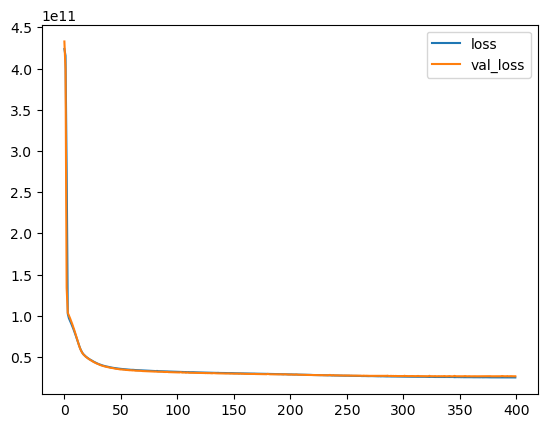

In [110]:
losses.plot()

#### 解讀以上的圖
* 1. 訓練損失 **（Training Loss）**：
    * 1.衡量模型性能，及模型擬合程度
    * 2.當隨著訓練次數減少，餅是最小化模型對數據的預測誤差
    * 3.但過低的訓練損失有可能代表過度擬合訓練數據
* 2. 驗證損失 **（Validation Loss）**：
    * 1.衡量了模型的泛化能力，即模型對未見過的數據的性能。
    * 2.驗證損失的目標是在模型訓練過程中保持一個低水平，以確保模型能夠泛化到不同的數據。
    * 3.驗證損失通常用於監控模型是否過擬合訓練數據，當驗證損失開始上升時，可能表示模型過度擬合。
    
* 3. 從以上圖來看， Loss隨著訓練後開始下降，而驗證損失也維持一個數值，並未反向上升

### 評估訓練後的模型數據

#### 導入三個套件測ˋ是回歸模型的套件
* 1.均方誤差 **（Mean Squared Error，MSE）**
    * MSE : 評估**"回歸模型"**的重要指標，越小表示模型預測與實際值越接近
* 2.平均絕對誤差 **（Mean Absolute Error，MAE）**
    * MAE : **MAE** 用於衡量模型的預測值與實際值之間的平均絕對誤差，越小越好
* 3.解釋方差分數 **（Explained Variance Score）**
    * **由 0~1 構成**，越接近 **1** 表示模型能夠很好解釋目標變數的變異性

補充 "目標變數的變異性" 
* 假設考試成績都很接近，表示變異性低，反之變異性高
* 在機器學習中，如果能夠解釋大部分目標變數之變異性，表示模型擬合程度佳
* 反之如果無法解釋變異性，則可能需要"改進模型" 或是 "進行特徵工程"

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

預測 test 數據

In [112]:
# X_test 先前已經由 MinMaxScaler 轉成 0-1 的數據集
X_test

array([[0.18181818, 0.125     , 0.05735849, ..., 0.010289  , 0.        ,
        1.        ],
       [0.36363636, 0.28125   , 0.13207547, ..., 0.00909894, 0.27272727,
        1.        ],
       [0.36363636, 0.3125    , 0.16679245, ..., 0.00418246, 0.09090909,
        1.        ],
       ...,
       [0.27272727, 0.25      , 0.17584906, ..., 0.00821673, 0.90909091,
        0.        ],
       [0.18181818, 0.125     , 0.04603774, ..., 0.0044122 , 0.27272727,
        1.        ],
       [0.36363636, 0.4375    , 0.24226415, ..., 0.01018447, 0.72727273,
        0.        ]])

我自己做的改善模型，多疊加一層 Dense(全連接層)
* 從 **MAE** **RMSE** 與 **explained_variance_score** 都比原先的程式碼更小一點

In [117]:
predict_Xtest = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [118]:
# 計算 MAE
mean_absolute_error(y_test,predict_Xtest)

100259.69704874499

In [119]:
# 計算 RMSE
np.sqrt(mean_squared_error(y_test, predict_Xtest))

163735.44175892643

In [120]:
# 計算 解釋方差分數（Explained Variance Score）
explained_variance_score(y_test, predict_Xtest)

0.8089594773919158

In [121]:
data['price'].mean()

540088.1417665294

In [122]:
data['price'].median()

450000.0

我們的測試

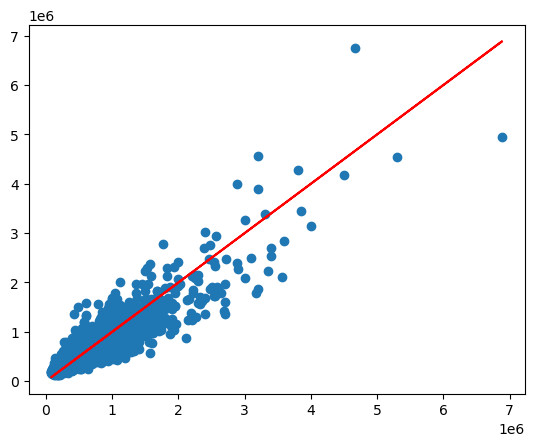

In [123]:
# 繪製 預測值（predictions）與 目標值（y_test） 之間的關係
plt.scatter(y_test, predict_Xtest)
# 繪製 完美預測的情況
plt.plot(y_test,y_test,'r')

當模型預測效果良好的時候，點散圖應該盡量集中靠近在斜線周圍
* 從上面的圖片來看，多數的樣本集中在斜線周圍

In [124]:
errors = y_test.values.reshape(6484, 1) -predict_Xtest

* 1 **.reshape(6484, 1)** 重新塑造**（reshape）**目標值的陣列
    * 將其轉換為形狀為 (6484, 1) 的二維陣列
    * 這樣做的目的是確保目標值的形狀與模型的預測值**（predictions）**的形狀相同，以便進行後續的計算。
* 2.**- predictions：** 這一步計算每個數據樣本的預測誤差
    * 即將實際目標值減去模型的預測值。

<Axes: ylabel='Count'>

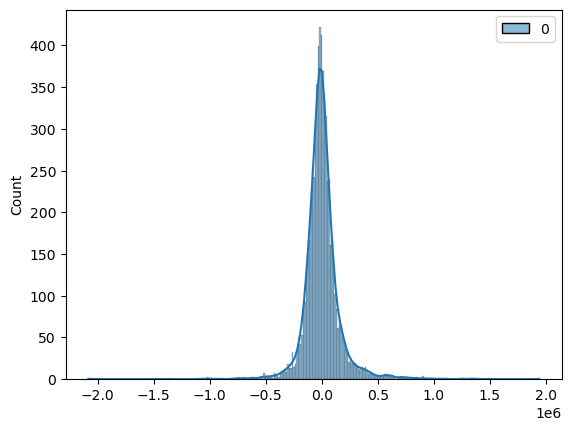

In [126]:
sns.histplot(errors, kde=True)

#### 來預測房價

In [129]:
# 選取第一行 觀察值，只留下特徵值
single_house = data.drop('price', axis=1).iloc[0]
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

In [130]:
# 將資料轉成一維陣列 (-1, 19)  -1 指 一維  
single_house = scaler.transform(single_house.values.reshape(-1,19))

C:\Users\baoqi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [131]:
single_house

array([[0.27272727, 0.125     , 0.06716981, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09758772,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00573322, 0.81818182, 0.        ]])

預測 single_house 的 prcie 數值

In [132]:
model.predict(single_house)

1/1 [==============================] - 0s 32ms/step


array([[288398.5]], dtype=float32)

In [133]:
# 來比對原先資料的 第一個觀察值
data.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

預測出來的數值為 288647.12 而原先的數值為  221900.0000 相差了一些，因此未來可以再來修改訓練過程提升模型準確度